### Домашнее задание к уроку 7

#### __1.__ К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [134]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, load_iris, make_moons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [135]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [136]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
#             Лазарева (
#             добавлено
    answers_weights = []
#             Лазарева)

    for x in x_test:
        test_distances = []
        test_weights = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))

#             Лазарева (
#             добавлено
            weight = 1 / (distance + 0.00001)
            test_weights.append((weight, y_train[i]))
#             Лазарева)
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
        
#             Лазарева (
#             добавлено 
        classes_weights = {class_item: 0 for class_item in set(y_train)}
        for r in sorted(test_weights)[0:k]:
            classes_weights[r[1]] += r[0]
#             Лазарева)

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
#             Лазарева (
#             добавлено 
        answers_weights.append(sorted(classes_weights, key=classes_weights.get)[-1])
#         print(classes_weights, sorted(classes_weights, key=classes_weights.get)[-1])
#             Лазарева)    


    return answers, answers_weights # Лазарева +", answers_weights" 

In [137]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [138]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z, Z_w = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k) # Лазарева +", Z_w"
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()
    
#     Лазарева (
#     Добавлено
    # Построим график
    Z_w = np.array(Z_w).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z_w, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая взвешенная kNN классификация при k = {k}")
    plt.show()
#     Лазарева )

In [165]:
X, y = make_blobs(n_samples=100, random_state=1)
# X, y = make_moons(n_samples=100, random_state=1)

# X, y = load_iris(return_X_y=True)

# # Для наглядности возьмем только первые два признака (всего в датасете их 4)
# X = X[:, :2]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((80, 2), (20, 2))

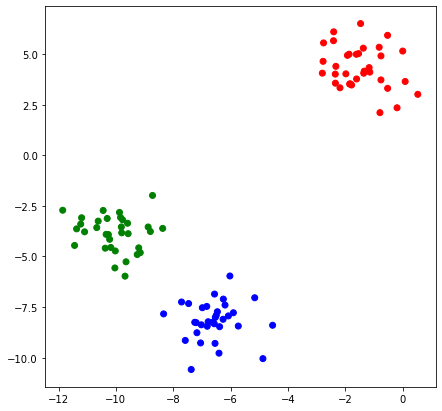

In [167]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [168]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [169]:
k = 5

y_pred, y_pred_w = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred_w, y_test):.3f}')

Точность алгоритма при k = 5: 1.000
Точность алгоритма при k = 5: 0.000


(26784, 2)


<ipython-input-138-2d60f59e90b6>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


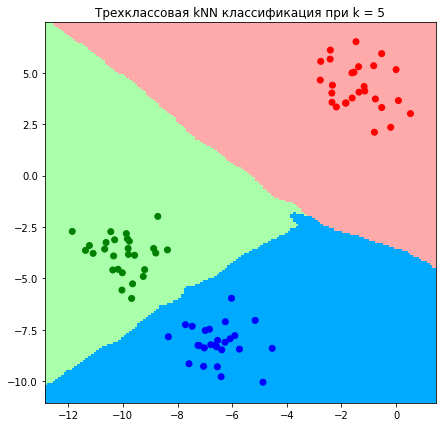

<ipython-input-138-2d60f59e90b6>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z_w, cmap=cmap_light)


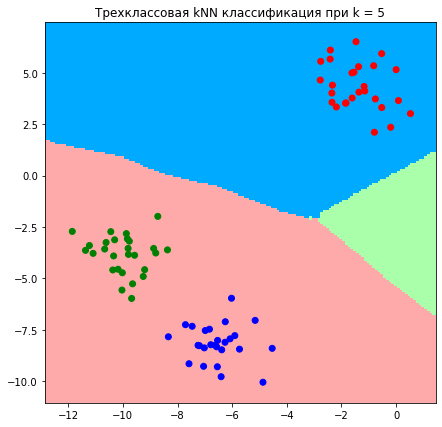

Wall time: 15.2 s


In [170]:
%%time
get_graph(X_train, y_train, k)

In [145]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])